# Tentative de reproduction de la valeur ajoutée

Objectif : tenter de comprendre comment l'Etat évalue les collèges.

In [1]:
# import des bibliotheques
# import bibliothéques d'analyse de python
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

import fonctions.perso_stats as perso_stats
import fonctions.perso_reg_lin as perso_reg_lin

In [2]:
# import des fichiers
                                              
college = pd.read_csv('donnee_temp/college.csv',low_memory=False)

In [3]:
# style graphe :
sns.set_theme(style="whitegrid")
#plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("pastel")
palette = sns.color_palette("pastel").as_hex()

In [4]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32984 entries, 0 to 32983
Data columns (total 63 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Rentrée scolaire                               32984 non-null  int64  
 1   Région                                         32982 non-null  object 
 2   Académie                                       32982 non-null  object 
 3   Département                                    32982 non-null  object 
 4   Commune                                        32982 non-null  object 
 5   UAI                                            32984 non-null  object 
 6   Dénomination principale                        32982 non-null  object 
 7   Patronyme                                      32927 non-null  object 
 8   Secteur                                        32982 non-null  object 
 9   REP                                            329

Dans la partie Analyse, il y a une colonne valeur ajoutée des collèges.<br>
Ce notebook va tenter de refaire cette colonne.<br>
Selon la notice, ils ont utilisé : <br>
<ul>
  <li>IPS : Indice de position Sociale</li>
  <li>le sexe des élèves</li>
  <li>les résultats des évaluations de sixième</li>
  <li>les retards des élèves</li>
</ul>
Ils ont prédit les résultats puis ils ont fait la différence entre les prédictions et les résultats réels.<br>
Je n'ai accès qu'aux sexes et à l'IPS. Mais testons ça.<br>


In [5]:
# prepa donne en mode rache : les données ayant pas de resultats utre que 2022 + college sans donnée
college2022 = college[college['Rentrée scolaire']==2022].copy()
college2022 = college2022[['VA de la note - G','3èmes filles','3èmes total','IPS',"Note à l'écrit - G",'Secteur',"Pourcentage Ulis sur le nombre d'eleves total"]]
college2022.dropna(inplace=True)

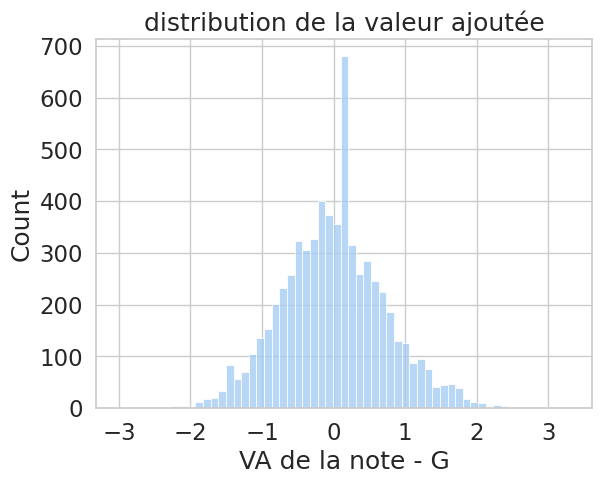

In [6]:
# distributon va de la note
fig,ax =plt.subplots()
sns.histplot(college2022,x='VA de la note - G',ax=ax)
ax.set_title('distribution de la valeur ajoutée')
plt.show()
del fig,ax

In [7]:
# test normalité valeur ajouté
rep = perso_stats.test_loi_normale(college2022['VA de la note - G'].sample(5000))
del rep



Interprétation du test:
H0 : La série suit une loi Normale
H1 : La série ne suit pas une loi Normale
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.0 %


In [8]:
print('la valeur ajoutée maximale est de :',college2022["VA de la note - G"].max())

la valeur ajoutée maximale est de : 3.3


In [9]:
print('la valeur ajoutée minimale est de :',college2022["VA de la note - G"].min())

la valeur ajoutée minimale est de : -3.0


In [10]:
college2022.corr(numeric_only=True)

,VA de la note - G,3èmes filles,3èmes total,IPS,Note à l'écrit - G,Pourcentage Ulis sur le nombre d'eleves total
VA de la note - G,1.000000,-0.093900,-0.101398,0.017461,0.485964,-0.079393
3èmes filles,-0.093900,1.000000,0.963959,0.177618,0.092927,-0.028998
3èmes total,-0.101398,0.963959,1.000000,0.169623,0.065161,-0.011900
IPS,0.017461,0.177618,0.169623,1.000000,0.793683,-0.268176
Note à l'écrit - G,0.485964,0.092927,0.065161,0.793683,1.000000,-0.226550
Pourcentage Ulis sur le nombre d'eleves total,-0.079393,-0.028998,-0.011900,-0.268176,-0.226550,1.000000


La distribution de la valeur ajoutée ne suit pas une loi normale.

intercept (const dans statmodels) 3.7199468395485624
Coefficients: 
 [0.07349661]
Erreur des moindres carrés train : 0.83
Coefficient de determination train : 0.63
erreur max train:  3.9909882248032655


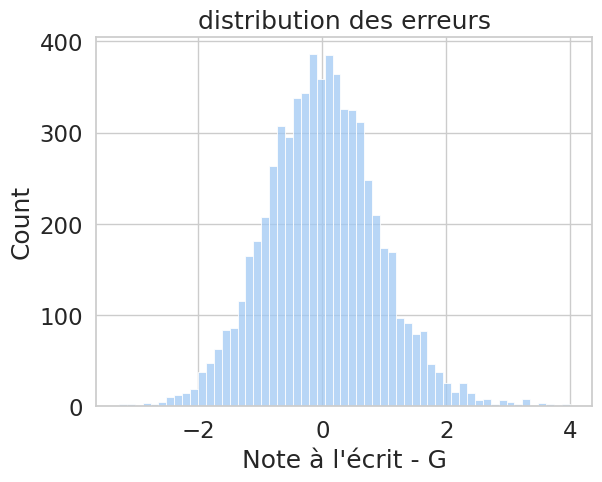


 test de Normalité des erreurs


Interprétation du test:
H0 : La série suit une loi Normale
H1 : La série ne suit pas une loi Normale
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.0 %




In [11]:
# test juste avec ips
data_reg_lin = college2022[['IPS',"Note à l'écrit - G"]].copy()
reg_lin = perso_reg_lin.regression_lineaire(data=data_reg_lin,colonne_cible="Note à l'écrit - G",intercept=True)

Bon juste avec l'IPS, on obtient déjà des résultats sympas : <br>
<ul>
<li>erreur des moindres carrés : inférieur à 1 : globalement, on est proche de la note réel.</li>
<li>erreur max d'environ 4 points pas terrible dans certain cas</li>
</ul>
Si on compare rapidement avec les valeurs ajoutées des collèges :
<ul>
    <li>les erreurs de la valeur ajoutée des notes ressemblent étrangement aux erreurs de la régression linéaire.</li>
    <li>les erreurs max sont supérieures avec mon modéle.</li>
</ul>

Bon essayons d'améliorer la régression linéaire.

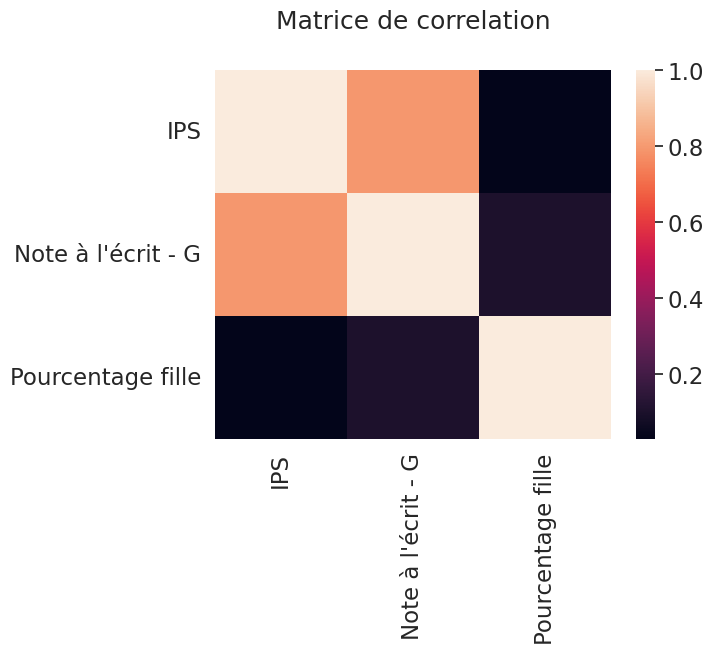

In [12]:
#regression lineaire avec le sexe des eleves + ips

college2022['Pourcentage fille'] = college2022['3èmes filles']/college2022['3èmes total']*100
data_reg_sex_ips = college2022[['IPS',"Note à l'écrit - G",'Pourcentage fille']].copy()
fig,ax = plt.subplots()
sns.heatmap(data_reg_sex_ips.corr(),ax=ax)
ax.set_title('Matrice de correlation',pad=30)
plt.show()

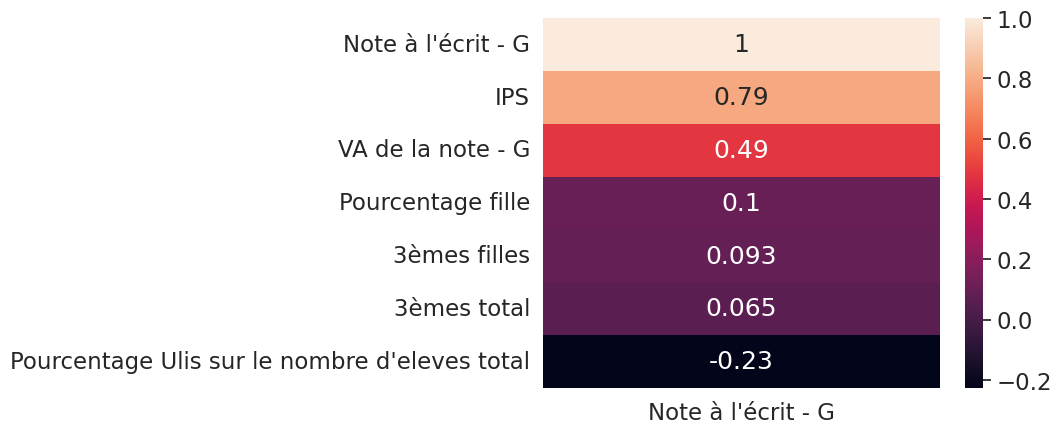

In [13]:
sns.heatmap(college2022.corr(numeric_only=True)[["Note à l'écrit - G"]].sort_values(by="Note à l'écrit - G",ascending=False),annot=True);

intercept (const dans statmodels) 2.7557799599878763
Coefficients: 
 [0.07328719 0.01988983]
Erreur des moindres carrés train : 0.82
Coefficient de determination train : 0.64
erreur max train:  4.075128264577


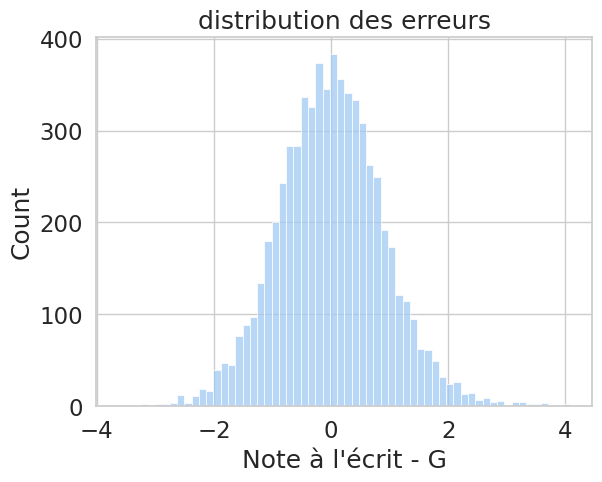


 test de Normalité des erreurs


Interprétation du test:
H0 : La série suit une loi Normale
H1 : La série ne suit pas une loi Normale
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.0 %




In [14]:
reg_lin_ips_sexe = perso_reg_lin.regression_lineaire(data=data_reg_sex_ips,colonne_cible="Note à l'écrit - G",intercept=True)

Le sexe des filles ne permet pas d'améliorer énormément le modèle. 

intercept (const dans statmodels) 2.803156637153002
Coefficients: 
 [ 0.07303099 -0.00983375  0.01975739]
Erreur des moindres carrés train : 0.82
Coefficient de determination train : 0.64
erreur max train:  4.055730479686213


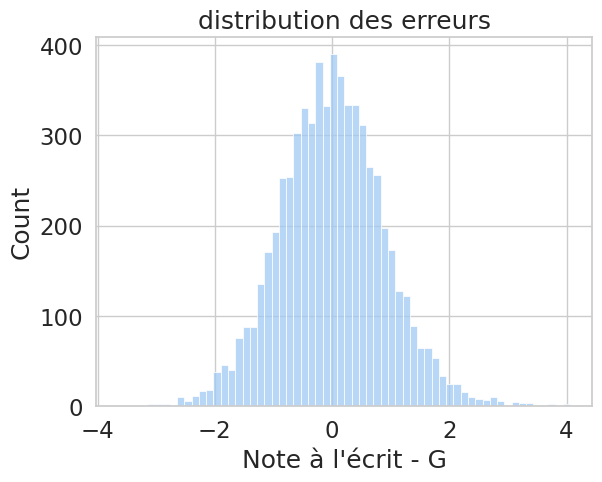


 test de Normalité des erreurs


Interprétation du test:
H0 : La série suit une loi Normale
H1 : La série ne suit pas une loi Normale
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.0 %




In [15]:
data_reg_ips_sex_ulis = college2022.copy()
data_reg_ips_sex_ulis.drop(columns=['Secteur',"VA de la note - G",'3èmes filles','3èmes total'],inplace=True)
reg_lin_ips_sex_ulis = perso_reg_lin.regression_lineaire(data=data_reg_ips_sex_ulis,colonne_cible="Note à l'écrit - G",intercept=True)

In [16]:
college2022['valeur_predite_reg_lin'] = reg_lin_ips_sex_ulis.predict(college2022[['IPS',"Pourcentage Ulis sur le nombre d'eleves total",'Pourcentage fille']])
college2022['différence_reglin_note'] = college2022["Note à l'écrit - G"]-college2022['valeur_predite_reg_lin']

In [17]:
college2022['différence_va_reglin'] = college2022["VA de la note - G"]-college2022['différence_reglin_note']

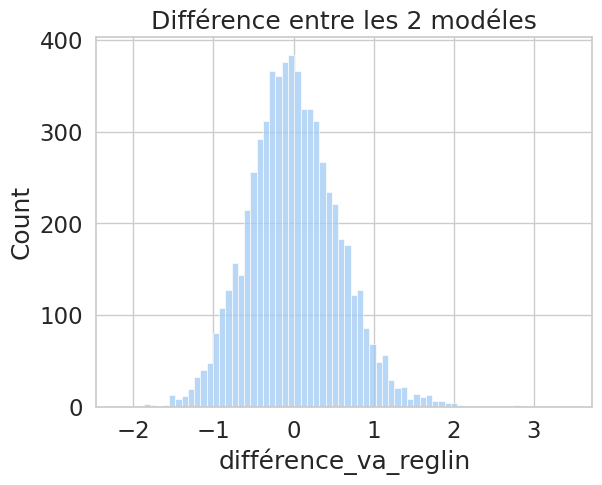

In [18]:
# difference entre les modeles
fig,ax =plt.subplots()
sns.histplot(college2022,x='différence_va_reglin',ax=ax)
ax.set_title('Différence entre les 2 modéles')
plt.show()
del fig,ax

Mon modèle a l'air assez proche du modèle utilisé par la VA. Il faut noter un écart de plus ou moins un point en moyenne entre les 2.

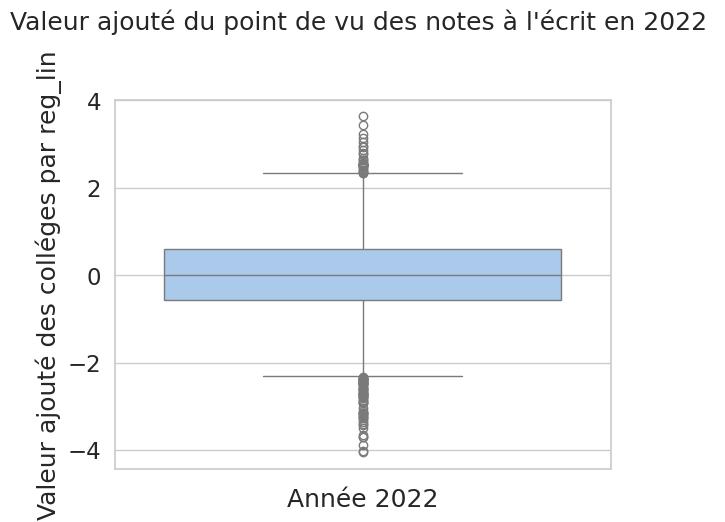

In [19]:
fig,ax = plt.subplots()
sns.boxplot(data=college2022, y="différence_reglin_note",ax=ax)
ax.set_title("Valeur ajouté du point de vu des notes à l'écrit en 2022 ",pad=50)
ax.set_ylabel("Valeur ajouté des colléges par reg_lin")
ax.set_xlabel("Année 2022")
plt.show()

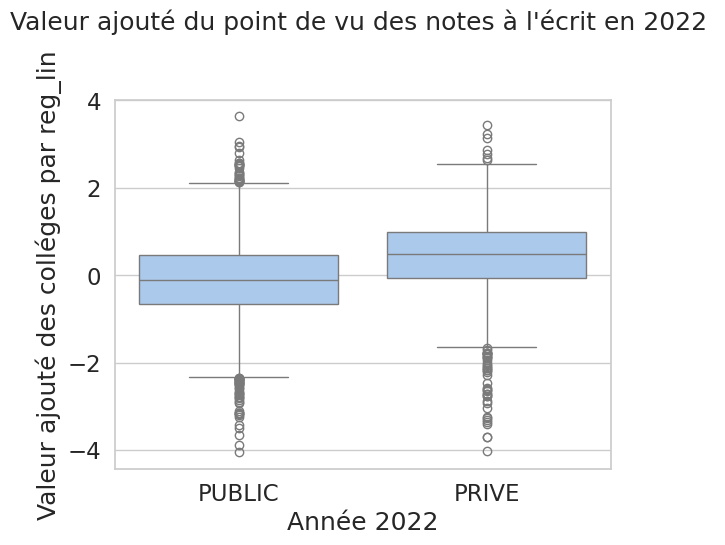

In [20]:
fig,ax = plt.subplots()
sns.boxplot(data=college2022,x='Secteur', y="différence_reglin_note",ax=ax)
ax.set_title("Valeur ajouté du point de vu des notes à l'écrit en 2022 ",pad=50)
ax.set_ylabel("Valeur ajouté des colléges par reg_lin")
ax.set_xlabel("Année 2022")
plt.show()

Je n'arrive pas à faire mieux que l'indicateur du gouvernement. Le modèle utilisé pour calculer la VA à l'air d'être une régression linéaire avec plus de données.
